In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted
%matplotlib inline

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', size=12) 
%config InlineBackend.figure_format = 'svg'

In [6]:
path = '/Users/patrick/Documents/phd/GitHub/tikhonov/'
g4iso_files = natsorted(glob.glob(path+"g4out/*KE_*_iso.csv"))
g4iso_angle_files = natsorted(glob.glob(path+"g4out/*theta_*_iso.csv"))

g4iso = np.zeros((2000,len(g4iso_files)))
for i in range(0,len(g4iso_files)-1):
    g4iso[:,i] =  np.loadtxt(open(g4iso_files[i], "r"), delimiter=",",skiprows=9)[:,3]

g4iso_angle = np.zeros((180,len(g4iso_angle_files)))
for i in range(0,len(g4iso_angle_files)-1):
    g4iso_angle[:,i] =  np.loadtxt(open(g4iso_angle_files[i], "r"), delimiter=",",skiprows=9)[:,3]
    

<ipython-input-34-3ae4556aed4b>:9: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(g4iso_angle[:,199]*1.0/np.max(g4iso_angle[:,199]),label='2000 keV')


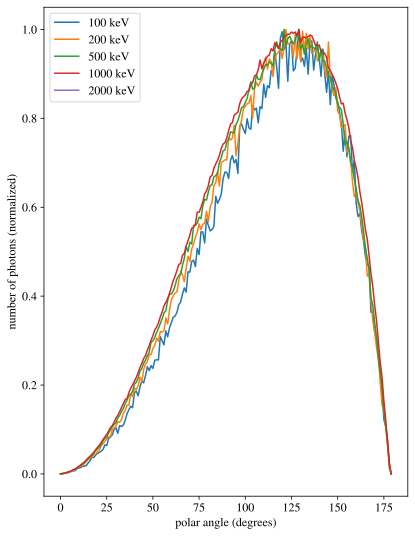

In [34]:
fig = plt.figure(figsize=(6.52437527778,9))
gs = plt.GridSpec(nrows=1, ncols=1,hspace=.3)
ax = fig.add_subplot(gs[0, 0])

ax.plot(g4iso_angle[:,10]*1.0/np.max(g4iso_angle[:,10]),label='100 keV')
ax.plot(g4iso_angle[:,20]*1.0/np.max(g4iso_angle[:,20]),label='200 keV')
ax.plot(g4iso_angle[:,50]*1.0/np.max(g4iso_angle[:,50]),label='500 keV')
ax.plot(g4iso_angle[:,100]*1.0/np.max(g4iso_angle[:,100]),label='1000 keV')
ax.plot(g4iso_angle[:,199]*1.0/np.max(g4iso_angle[:,199]),label='2000 keV')
ax.set_ylabel("number of photons (normalized)")
ax.set_xlabel("polar angle (degrees)")
ax.legend()

fig.savefig('photon_angle_independence.pdf', bbox_inches='tight')
